# Study Notebook

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/p5test/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/p5test'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv")
    .drop(['2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinType1', 'EnclosedPorch','GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF'], axis=1)
    )
df.head(1641)

,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,KitchenQual,LotArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,706,150,548,1710,Gd,8450,61,5,7,856,2003,2003,208500
1,1262,978,284,460,1262,TA,9600,0,8,6,1262,1976,1976,181500
2,920,486,434,608,1786,Gd,11250,42,5,7,920,2001,2002,223500
3,961,216,540,642,1717,Gd,9550,35,5,7,756,1915,1970,140000
4,1145,655,490,836,2198,Gd,14260,84,5,8,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,0,953,460,1647,TA,7917,40,5,6,953,1999,2000,175000
1456,2073,790,589,500,2073,TA,13175,0,6,6,1542,1978,1988,210000
1457,1188,275,877,252,2340,Gd,9042,60,9,7,1152,1941,2006,266500
1458,1078,49,0,240,1078,Gd,9717,0,6,5,1078,1950,1996,142125


 # Correlation Study

Remove columns with NaN

In [5]:
# df.dropna(axis=1)

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 17)


,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,706,150,548,1710,8450,61,5,7,856,2003,2003,208500,1,0,0,0
1,1262,978,284,460,1262,9600,0,8,6,1262,1976,1976,181500,0,1,0,0
2,920,486,434,608,1786,11250,42,5,7,920,2001,2002,223500,1,0,0,0


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [7]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
OpenPorchSF       0.477561
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [8]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
BsmtFinSF1        0.386420
Name: SalePrice, dtype: float64

For both methods, we notice weak or moderate levels of correlation between SalePrice and a given variable. 
* Ideally, we pursue strong correlation levels. However, this is not always possible.

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Therefore we are studying at df the following variables. We will investigate if:
* TBC.
* TBC.
* TBC.
* TBC.
* TBC.

# Examination of Sale Prices

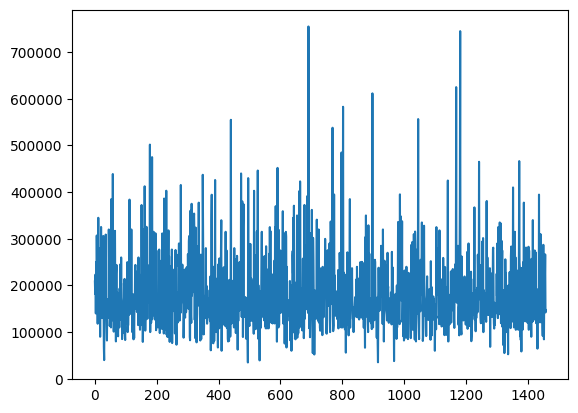

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.get_dataset_names()

plt.plot(df[['SalePrice']])
plt.show()

As we can see, most of the 1,460 houses sold within the $10k to $30k range, with fewer selling between the $40k to $50k range and only 2 selling for above $70k.

## Variables Distribution by SalePrice

### 1stFlrSF

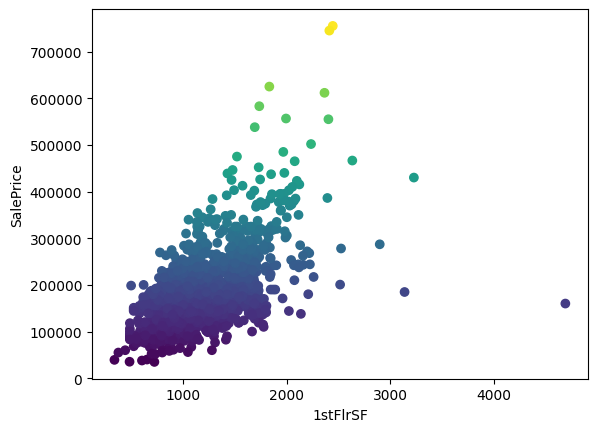

In [11]:
x, y = '1stFlrSF' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for above here

### Garage Price

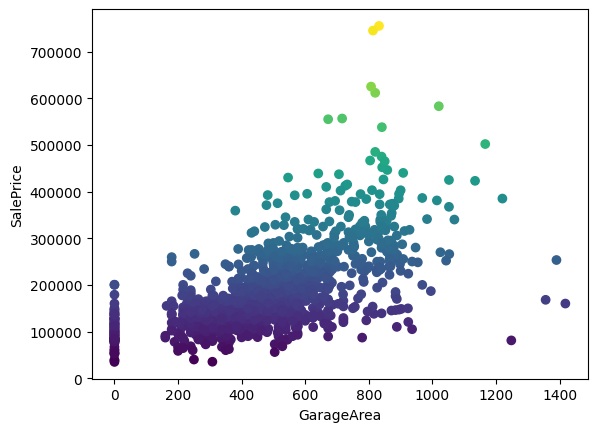

In [12]:
x, y = 'GarageArea' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for the above here

### Gr Liv Area

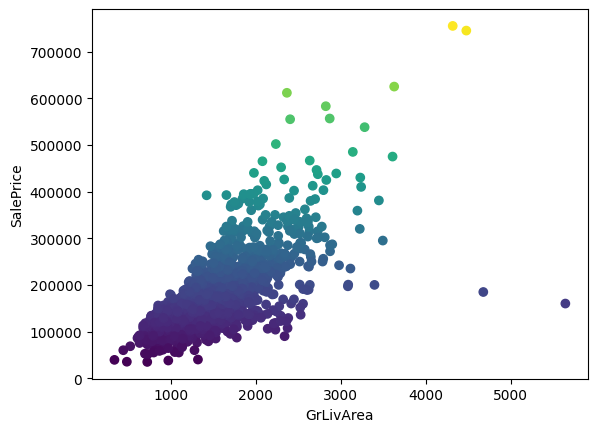

In [13]:
x, y = 'GrLivArea' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for the above here

### Total Basement SF

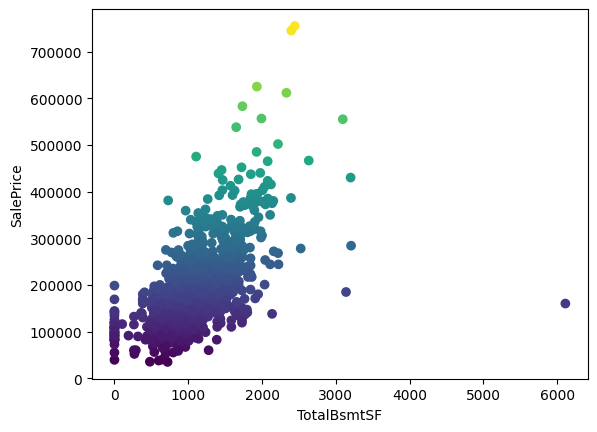

In [14]:
x, y = 'TotalBsmtSF' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

### YearBuilt

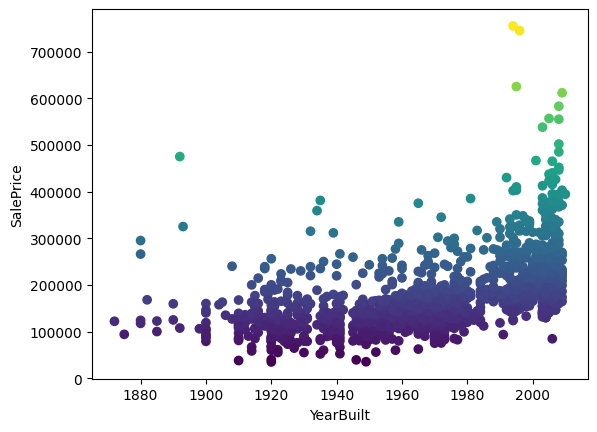

In [15]:
x, y = 'YearBuilt' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()